In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import resample  # For class balancing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import HeUniform, GlorotUniform
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess training data
data_train = pd.read_csv("train.csv")
data_train = data_train.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
data_train['Sex'] = data_train['Sex'].map({'male': 0, 'female': 1})
data_train['Age'].fillna(data_train['Age'].mean(), inplace=True)
data_train.fillna('NULL', inplace=True)

X_train = data_train.drop('Survived', axis=1)
y_train = data_train['Survived']

<ipython-input-2-37ac7520c063>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['Age'].fillna(data_train['Age'].mean(), inplace=True)


In [ ]:
# Load and preprocess test data
test_data = pd.read_csv("test.csv")
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data = test_data.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
passenger_ids = test_data['PassengerId']
test_data = test_data.drop('PassengerId', axis=1)

<ipython-input-3-77f81c713bcc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)


In [ ]:
# Split data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
accuracy_log_reg = log_reg.score(X_val, y_val)

# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
accuracy_rf = rf_clf.score(X_val, y_val)

In [ ]:
# Import necessary Keras components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import HeUniform, GlorotUniform
from sklearn.preprocessing import StandardScaler


# Normalize features with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train and scale train
X_val_scaled = scaler.transform(X_val)  # Scale validation data the same way


# Updated Keras Model Definitions with Simpler Architecture
def create_model_optimized():
    model = Sequential([
        Dense(128, activation='relu', kernel_initializer=HeUniform(), input_dim=X_train_scaled.shape[1]),
        BatchNormalization(),
        Dropout(0.2),  # Light regularization
        Dense(32, activation='relu', kernel_initializer=HeUniform()),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform())
    ])

    # Optimizer with a smaller learning rate
    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


# EarlyStopping Callback to stop when validation stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Initialize the new model
model_optimized = create_model_optimized()

# Train the optimized model with updated hyperparameters
history_optimized = model_optimized.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=50,  # Allow enough time for convergence
    batch_size=16,  # Use smaller batch size to make training smoother
    callbacks=[early_stopping],
    verbose=2
)

# Evaluate the updated model on the validation set
accuracy_optimized = model_optimized.evaluate(X_val_scaled, y_val, verbose=0)[1]

print(f"Optimized Model Validation Accuracy: {accuracy_optimized:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
36/36 - 4s - 105ms/step - accuracy: 0.5483 - loss: 0.8786 - val_accuracy: 0.7343 - val_loss: 0.5660
Epoch 2/50
36/36 - 0s - 3ms/step - accuracy: 0.7329 - loss: 0.5467 - val_accuracy: 0.8112 - val_loss: 0.4975
Epoch 3/50
36/36 - 0s - 4ms/step - accuracy: 0.7487 - loss: 0.5537 - val_accuracy: 0.7972 - val_loss: 0.4609
Epoch 4/50
36/36 - 0s - 4ms/step - accuracy: 0.7645 - loss: 0.5361 - val_accuracy: 0.8322 - val_loss: 0.4370
Epoch 5/50
36/36 - 0s - 4ms/step - accuracy: 0.7715 - loss: 0.5036 - val_accuracy: 0.8392 - val_loss: 0.4220
Epoch 6/50
36/36 - 0s - 4ms/step - accuracy: 0.7768 - loss: 0.5044 - val_accuracy: 0.8392 - val_loss: 0.4150
Epoch 7/50
36/36 - 0s - 4ms/step - accuracy: 0.7821 - loss: 0.5394 - val_accuracy: 0.8322 - val_loss: 0.4063
Epoch 8/50
36/36 - 0s - 3ms/step - accuracy: 0.7944 - loss: 0.4885 - val_accuracy: 0.8322 - val_loss: 0.4024
Epoch 9/50
36/36 - 0s - 4ms/step - accuracy: 0.7768 - loss: 0.4930 - val_accuracy: 0.8322 - val_loss: 0.3999
Epoch 10/50
36/36

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotUniform

# ReLU and its derivative
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

# Initialize neural network weights with Xavier initialization (to prevent large/small weights)
def initialize_weights(input_size, hidden_sizes, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_sizes[0]) * np.sqrt(2 / input_size)  # He initialization for ReLU
    b1 = np.zeros((1, hidden_sizes[0]))
    W2 = np.random.randn(hidden_sizes[0], hidden_sizes[1]) * np.sqrt(2 / hidden_sizes[0])
    b2 = np.zeros((1, hidden_sizes[1]))
    W3 = np.random.randn(hidden_sizes[1], output_size) * np.sqrt(2 / hidden_sizes[1])
    b3 = np.zeros((1, output_size))
    return W1, b1, W2, b2, W3, b3

# Forward propagation with ReLU and sigmoid for output layer
def forward_propagation(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)

    Z3 = np.dot(A2, W3) + b3
    A3 = 1 / (1 + np.exp(-Z3))  # Sigmoid activation for output layer

    cache = (Z1, A1, Z2, A2, Z3, A3)
    return A3, cache

# Compute binary cross-entropy loss
def compute_cost(A3, Y):
    m = Y.shape[0]
    cost = -np.sum(Y * np.log(A3 + 1e-7) + (1 - Y) * np.log(1 - A3 + 1e-7)) / m
    return cost

# Backward propagation logic
def backward_propagation(X, Y, cache, W1, W2, W3):
    m = X.shape[0]
    Z1, A1, Z2, A2, Z3, A3 = cache

    # Output layer
    dZ3 = A3 - Y
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    # Backpropagate to second hidden layer
    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Backpropagate to first hidden layer
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    gradients = (dW1, db1, dW2, db2, dW3, db3)
    return gradients

# Update neural network parameters
def update_parameters(W1, b1, W2, b2, W3, b3, gradients, learning_rate):
    dW1, db1, dW2, db2, dW3, db3 = gradients
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    return W1, b1, W2, b2, W3, b3

# Balance classes using oversampling (upsampling the minority class)
def balance_classes(X, y):
    X_minority = X[y == 1]
    y_minority = y[y == 1]
    X_majority = X[y == 0]
    y_majority = y[y == 0]

    X_minority_upsampled, y_minority_upsampled = resample(
        X_minority, y_minority, replace=True, n_samples=len(y_majority), random_state=42
    )
    X_balanced = np.vstack([X_majority, X_minority_upsampled])
    y_balanced = np.hstack([y_majority, y_minority_upsampled])
    return X_balanced, y_balanced

# Predict function to classify output based on threshold
def predict_nn(X, W1, b1, W2, b2, W3, b3):
    A3, _ = forward_propagation(X, W1, b1, W2, b2, W3, b3)
    return (A3 > 0.5).astype(int)

# Main model training and evaluation
def train_nn(X_train, y_train, X_val, y_val, hidden_sizes=[64, 64], learning_rate=0.001, epochs=50):
    # Normalize and balance data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.values)
    X_val_scaled = scaler.transform(X_val.values)
    X_train_balanced, y_train_balanced = balance_classes(X_train_scaled, y_train.values)

    # Initialize weights
    W1, b1, W2, b2, W3, b3 = initialize_weights(X_train_balanced.shape[1], hidden_sizes, 1)

    # Main training loop
    for epoch in range(epochs):
        A3, cache = forward_propagation(X_train_balanced, W1, b1, W2, b2, W3, b3)
        cost = compute_cost(A3, y_train_balanced.reshape(-1, 1))
        gradients = backward_propagation(X_train_balanced, y_train_balanced.reshape(-1, 1), cache, W1, W2, W3)
        W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, gradients, learning_rate)

        if epoch % 5 == 0:
            # Calculate training accuracy
            train_predictions = predict_nn(X_train_balanced, W1, b1, W2, b2, W3, b3)
            train_accuracy = accuracy_score(y_train_balanced, train_predictions)
            print(f"Epoch {epoch}: Cost = {cost:.4f}, Training Accuracy = {train_accuracy:.4f}")

    # Final evaluation on validation set
    predictions_nn = predict_nn(X_val_scaled, W1, b1, W2, b2, W3, b3)
    accuracy_nn = accuracy_score(y_val, predictions_nn)
    print(f"Validation Accuracy: {accuracy_nn:.4f}")
    return W1, b1, W2, b2, W3, b3

# Assuming X_train, y_train, X_val, y_val are already defined
W1, b1, W2, b2, W3, b3 = train_nn(X_train, y_train, X_val, y_val)

# Assuming test_data and passenger_ids are defined
# Normalize test_data using the same scaler as training
scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(test_data.values)

# Make predictions on the test dataset
predictions_custom_nn = predict_nn(test_data_scaled, W1, b1, W2, b2, W3, b3)

# Save predictions to a CSV file
submission_custom_nn = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions_custom_nn.flatten()
})
submission_custom_nn.to_csv('submission_custom_nn.csv', index=False)

print("Base NN Model Predictions have been saved to 'submission_custom_nn.csv'.")



Epoch 0: Cost = 0.7166, Training Accuracy = 0.6509
Epoch 5: Cost = 0.7110, Training Accuracy = 0.6509
Epoch 10: Cost = 0.7055, Training Accuracy = 0.6543
Epoch 15: Cost = 0.7002, Training Accuracy = 0.6565
Epoch 20: Cost = 0.6949, Training Accuracy = 0.6565
Epoch 25: Cost = 0.6898, Training Accuracy = 0.6644
Epoch 30: Cost = 0.6849, Training Accuracy = 0.6655
Epoch 35: Cost = 0.6800, Training Accuracy = 0.6644
Epoch 40: Cost = 0.6753, Training Accuracy = 0.6723
Epoch 45: Cost = 0.6706, Training Accuracy = 0.6745
Validation Accuracy: 0.7654
Base NN Model Predictions have been saved to 'submission_custom_nn.csv'.


In [ ]:
# Print Model Accuracies
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Optimized Model Validation Accuracy: {accuracy_optimized}")



Logistic Regression Accuracy: 0.8268156424581006
Random Forest Accuracy: 0.8212290502793296
Optimized Model Validation Accuracy: 0.8212290406227112


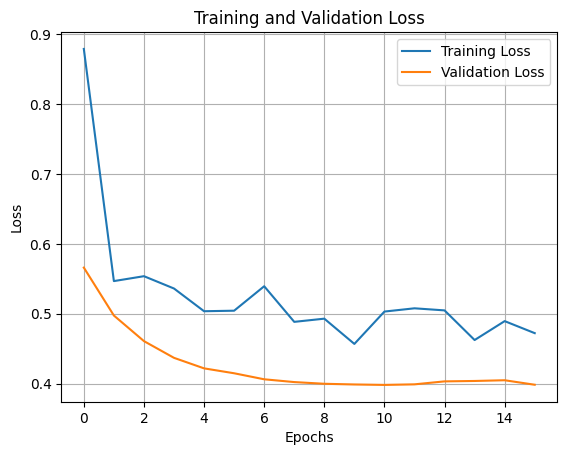

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss (from Keras model history)
plt.plot(history_optimized.history['loss'], label='Training Loss')
plt.plot(history_optimized.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


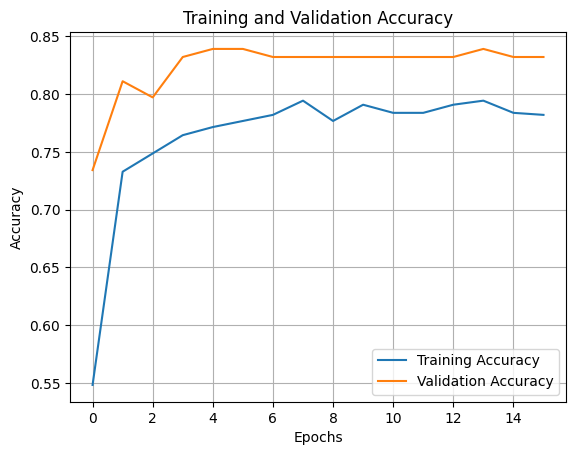

In [ ]:
# Plot the training and validation accuracy
plt.plot(history_optimized.history['accuracy'], label='Training Accuracy')
plt.plot(history_optimized.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


In [ ]:
predictions_log_reg = log_reg.predict(test_data)
predictions_rf = rf_clf.predict(test_data)
predictions_keras_nn = (model_optimized.predict(test_data) > 0.5).astype(int)
predictions_custom_nn = predict_nn(test_data.values, W1, b1, W2, b2, W3, b3)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
# Example with Logistic Regression predictions
submission_log_reg = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions_log_reg
})

# Save to a CSV file for submission
submission_log_reg.to_csv('submission_log_reg.csv', index=False)

# Repeat for other models
submission_rf = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions_rf
})
submission_rf.to_csv('submission_rf.csv', index=False)

submission_keras_nn = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions_keras_nn.flatten()
})
submission_keras_nn.to_csv('submission_keras_nn.csv', index=False)

submission_custom_nn = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions_custom_nn.flatten()
})
submission_custom_nn.to_csv('submission_custom_nn.csv', index=False)


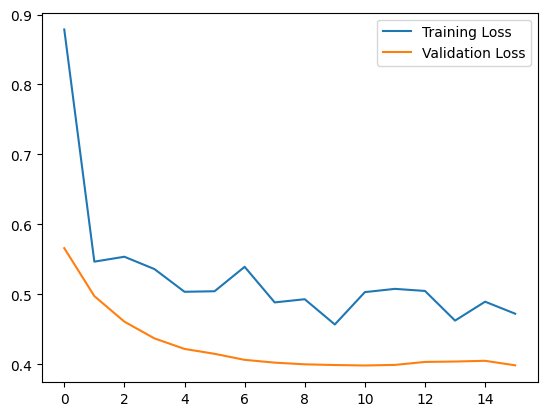

In [ ]:
plt.plot(history_optimized.history['loss'], label='Training Loss')
plt.plot(history_optimized.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Assuming you have already trained the Base NN model with the weights W1, b1, W2, b2, W3, b3

# Make predictions on the test set using the Base NN model
predictions_custom_nn = predict_nn(test_data.values, W1, b1, W2, b2, W3, b3)

# Create a DataFrame for submission with PassengerId and the predicted 'Survived' column
submission_custom_nn = pd.DataFrame({
    'PassengerId': passenger_ids,  # Assuming 'passenger_ids' has the Passenger IDs from the test data
    'Survived': predictions_custom_nn.flatten()  # Flatten predictions if necessary
})

# Save the predictions to a CSV file
submission_custom_nn.to_csv('submission_custom_nn.csv', index=False)

print("Base NN Model Predictions have been saved to 'submission_custom_nn.csv'.")


Base NN Model Predictions have been saved to 'submission_custom_nn.csv'.
